In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [47]:
folder='data_original/MRI'
files = os.listdir(folder)
#read files
features=0
for file in files:
    if file.endswith('.csv'):
        print(file)
        df = pd.read_csv(folder+'/'+file, sep=',')
        #print(df.head())
        #print(df.columns)
        print(df.shape)
        features+=df.shape[1]
print('Total features:',features)   

WM.csv
(4603, 426)
ASEG.csv
(4603, 291)
RHDKT.csv
(4603, 103)
LHA2009.csv
(4603, 232)
LHDKT.csv
(4603, 103)
RHA2009.csv
(4603, 232)
Subjects.csv
(4603, 1)
BRAIN.csv
(4603, 17)
RHAPARC.csv
(4603, 112)
LHAPARC.csv
(4603, 112)
Total features: 1629


In [48]:
folder='data/original'
files = os.listdir(folder)
#read files
features=0
for file in files:
    if file.endswith('.csv'):
        print(file)
        df = pd.read_csv(folder+'/'+file, sep='\t')
        #print(df.head())
        #print(df.columns)
        print(df.shape)
        features+=df.shape[1]
print('Total features:',features)   

WM.csv
(4603, 426)
ASEG.csv
(4603, 282)
RHDKT.csv
(4603, 103)
LHA2009.csv
(4603, 223)
LHDKT.csv
(4603, 96)
RHA2009.csv
(492, 223)
Subjects.csv
(4603, 8)
BRAIN.csv
(4603, 8)
RHAPARC.csv
(4603, 103)
LHAPARC.csv
(4603, 103)
Total features: 1575


In [50]:
filename='data/negative_norm_confirmed/all_concatenated.csv'
df = pd.read_csv(filename, sep='\t')
print(df.shape)

(2276, 1566)


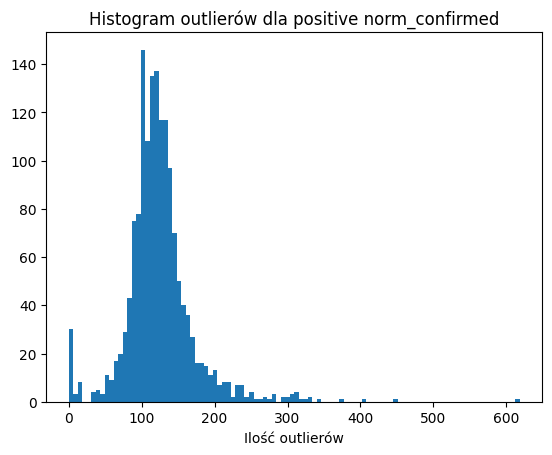

In [51]:
type='positive'
filename=f'results/{type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

#make a histogram from row 'outliers_values'

plt.hist(df.loc['outliers_number'], bins=100)
plt.title(f'Histogram outlierów dla {type} norm_confirmed')
plt.xlabel('Ilość outlierów')
plt.savefig(f'plots/outliers_{type}.png')

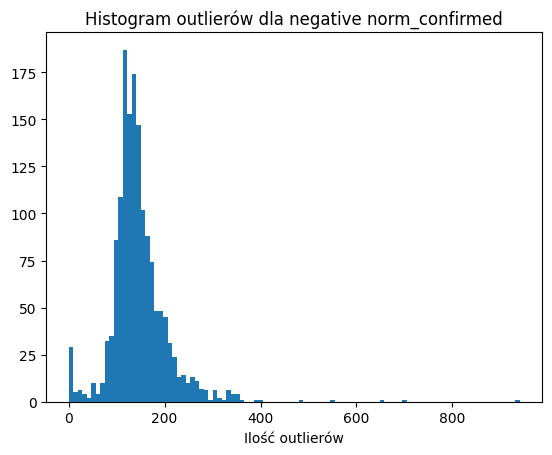

In [54]:
type='negative'
filename=f'results/{type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

#make a histogram from row 'outliers_values'

plt.hist(df.loc['outliers_number'], bins=100)
plt.title(f'Histogram outlierów dla {type} norm_confirmed')
plt.xlabel('Ilość outlierów')
plt.savefig(f'plots/outliers_{type}.png')

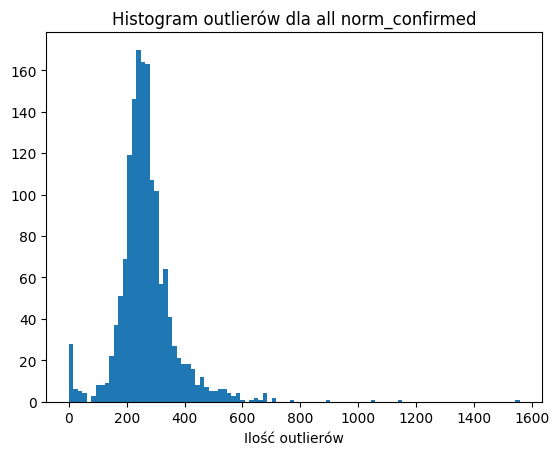

In [55]:
type='all'
filename=f'results/{type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

#make a histogram from row 'outliers_values'

plt.hist(df.loc['outliers_number'], bins=100)
plt.title(f'Histogram outlierów dla {type} norm_confirmed')
plt.xlabel('Ilość outlierów')
plt.savefig(f'plots/outliers_{type}.png')

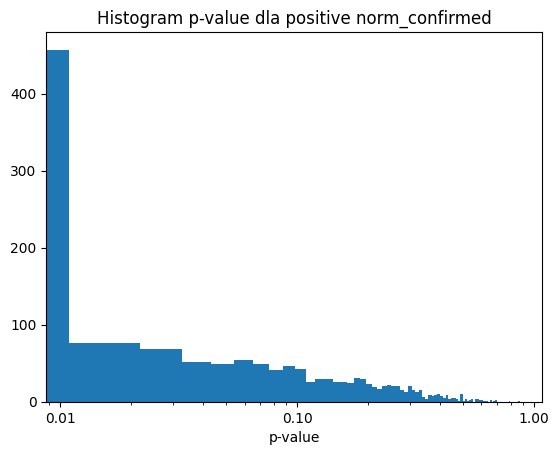

In [56]:
type='positive'
filename=f'results/{type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

#make a histogram from row 'outliers_values'

plt.hist(df.loc['p_after'], bins=80)
plt.title(f'Histogram p-value dla {type} norm_confirmed')
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.xlabel('p-value')
plt.savefig(f'plots/pvalue_{type}_log.png')

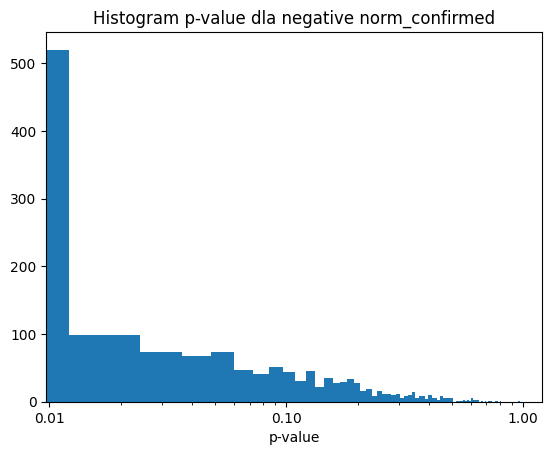

In [57]:
type='negative'
filename=f'results/{type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

#make a histogram from row 'outliers_values'

plt.hist(df.loc['p_after'], bins=80)
plt.title(f'Histogram p-value dla {type} norm_confirmed')
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.xlabel('p-value')
plt.savefig(f'plots/pvalue_{type}_log.png')

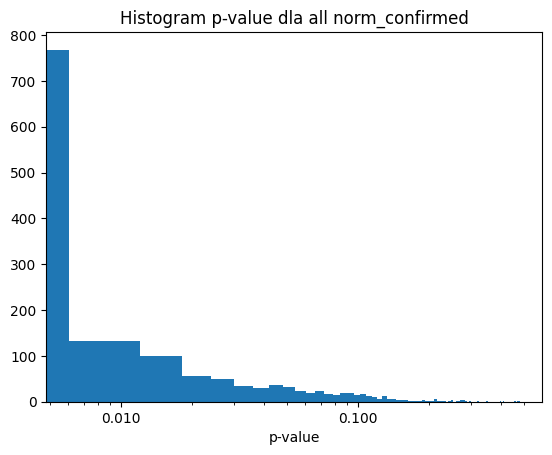

In [58]:
type='all'
filename=f'results/{type}_outliers_values.csv'
df = pd.read_csv(filename, sep='\t', index_col=0)

#make a histogram from row 'outliers_values'

plt.hist(df.loc['p_after'], bins=80)
plt.title(f'Histogram p-value dla {type} norm_confirmed')
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.xlabel('p-value')
plt.savefig(f'plots/pvalue_{type}_log.png')

In [42]:
import numpy as np

In [85]:
#del type
filename=f'results/importance_age_rnn.csv'
nr_of_component=2
nr_of_features=20
df = pd.read_csv(filename, sep='\t', index_col=0)
explained_var_first = [[] for _ in range(nr_of_features)]
#find all cells with LH_Mean_Thickness in first row
names=[]
for cell in df.iloc[nr_of_component][:nr_of_features]:
    names.append(cell)

for j, cell in enumerate(df.iloc[nr_of_component]):
    for i, name in enumerate(names):
        if type(cell)==str:
            if name in cell:
                explained_var_first[i].append(df.iloc[nr_of_component][j + nr_of_features+1])

# Konwertuj listy na tablice numpy
explained_var_first = [np.array(x) for x in explained_var_first]

# Oblicz średnią i odchylenie standardowe dla każdej cechy
for i, values in enumerate(explained_var_first):
    mean_value = np.mean(values) if len(values) > 0 else np.nan
    std_value = np.std(values) if len(values) > 0 else np.nan
    print(f"Feature {names[i]}:")
    print(f"Mean: {mean_value}")
    print(f"Std Dev: {std_value}")

Feature RH_White_Surface_Total_Area:
Mean: -0.11010143216242507
Std Dev: 0.003202896827189026
Feature LH_White_Surface_Total_Area:
Mean: -0.11005702279663894
Std Dev: 0.0032023246519765265
Feature Supratentorial_volume_voxel_count:
Mean: -0.09965998824493649
Std Dev: 0.003849915359955596
Feature Mask_Volume:
Mean: -0.09270173844636356
Std Dev: 0.0037101409752933853
Feature ASEG-wm-lh-middletemporal_normStdDev:
Mean: -0.07156155712761415
Std Dev: 0.0048500156271299045
Feature Subcortical_gray_matter_volume:
Mean: -0.08224026574334198
Std Dev: 0.0034365873162051233
Feature ASEG-wm-rh-middletemporal_normStdDev:
Mean: -0.07054204362940136
Std Dev: 0.0027847013840798063
Feature ASEG-wm-lh-precentral_normStdDev:
Mean: -0.070053789127673
Std Dev: 0.0012761417255677246
Feature ASEG-wm-lh-supramarginal_normStdDev:
Mean: -0.06718016254049
Std Dev: 0.002750002912774447
Feature ASEG-wm-lh-inferiorparietal_normStdDev:
Mean: -0.06770322017889911
Std Dev: 0.0019741034234544417
Feature ASEG-wm-lh-caud

/tmp/ipykernel_12792/67130333.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  explained_var_first[i].append(df.iloc[nr_of_component][j + nr_of_features+1])


In [ ]:
filename=f'results/importance_sex_rnn.csv'
nr_of_component=0
nr_of_features=20
df = pd.read_csv(filename, sep='\t', index_col=0)
explained_var_first = [[] for _ in range(nr_of_features)]
#find all cells with LH_Mean_Thickness in first row
names=[]
for cell in df.iloc[nr_of_component][:nr_of_features]:
    names.append(cell)

for j, cell in enumerate(df.iloc[nr_of_component]):
    for i, name in enumerate(names):
        if type(cell)==str:
            if name in cell:
                explained_var_first[i].append(df.iloc[nr_of_component][j + nr_of_features+1])

# Konwertuj listy na tablice numpy
explained_var_first = [np.array(x) for x in explained_var_first]

# Oblicz średnią i odchylenie standardowe dla każdej cechy
for i, values in enumerate(explained_var_first):
    mean_value = np.mean(values) if len(values) > 0 else np.nan
    std_value = np.std(values) if len(values) > 0 else np.nan
    print(f"Feature {names[i]}:")
    print(f"Mean: {mean_value}")
    print(f"Std Dev: {std_value}")

Feature LH_Mean_Thickness:
Mean: 0.06639604135596647
Std Dev: 0.00040894997199888706
Feature RH_Mean_Thickness:
Mean: 0.06611622109939008
Std Dev: 0.0003681036993953243
Feature Left_hemisphere_cortical_gray_matter_volume:
Mean: 0.06246758859603822
Std Dev: 0.0005965339872002654
Feature APARC-ctx-lh-precuneus_ThickAvg:
Mean: 0.061447114665355775
Std Dev: 0.00039962101324063695
Feature DKT-ctx-lh-precuneus_ThickAvg:
Mean: 0.06103297123721578
Std Dev: 0.00040895903100053626
Feature APARC-ctx-rh-supramarginal_ThickAvg:
Mean: 0.0603722950648448
Std Dev: 0.00032565065898673657
Feature DKT-ctx-rh-supramarginal_ThickAvg:
Mean: 0.060176641307754644
Std Dev: 0.0003259754614868173
Feature APARC-ctx-rh-precuneus_ThickAvg:
Mean: 0.06050433253472791
Std Dev: 0.000335422722092386
Feature APARC-ctx-rh-inferiorparietal_ThickAvg:
Mean: 0.059848693101940145
Std Dev: 0.00037306887342890586
Feature DKT-ctx-rh-inferiorparietal_ThickAvg:
Mean: 0.059815332837997816
Std Dev: 0.00037416566552356815
Feature Tota

/tmp/ipykernel_12792/4268155923.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  explained_var_first[i].append(df.iloc[nr_of_component][j + nr_of_features+1])


In [44]:
filename=f'results/importance_age_rnn.csv'
nr_of_component=1
nr_of_features=5
df = pd.read_csv(filename, sep='\t', index_col=0)
explained_var_first = [[] for _ in range(nr_of_features)]
#find all cells with LH_Mean_Thickness in first row
names=[]
for cell in df.iloc[nr_of_component][:nr_of_features]:
    names.append(cell)

for j, cell in enumerate(df.iloc[nr_of_component]):
    for i, name in enumerate(names):
        if type(cell)==str:
            if name in cell:
                explained_var_first[i].append(df.iloc[nr_of_component][j + nr_of_features+1])

# Konwertuj listy na tablice numpy
explained_var_first = [np.array(x) for x in explained_var_first]

# Oblicz średnią i odchylenie standardowe dla każdej cechy
for i, values in enumerate(explained_var_first):
    mean_value = np.mean(values) if len(values) > 0 else np.nan
    std_value = np.std(values) if len(values) > 0 else np.nan
    print(f"Feature {names[i]}:")
    print(f"Mean: {mean_value}")
    print(f"Std Dev: {std_value}")

Feature ASEG-wm-lh-precuneus_normStdDev:
Mean: 0.09230469107530845
Std Dev: 0.002765760899590419
Feature ASEG-Left-Hippocampus_normMean:
Mean: -0.09187702007040982
Std Dev: 0.003302229434560223
Feature ASEG-Right-Hippocampus_normMean:
Mean: -0.09251064685069048
Std Dev: 0.0017776164537318634
Feature ASEG-wm-rh-fusiform_normStdDev:
Mean: 0.09128865243627896
Std Dev: 0.002940734566447276
Feature ASEG-wm-lh-fusiform_normStdDev:
Mean: 0.09115950920908288
Std Dev: 0.0023857192217039583


/tmp/ipykernel_82018/3947134011.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  explained_var_first[i].append(df.iloc[nr_of_component][j + nr_of_features+1])


In [45]:
filename=f'results/importance_age_rnn.csv'
nr_of_component=0
expl_var=[]
df = pd.read_csv(filename, sep='\t', index_col=0)
for column in df.columns:
    if 'Explained Variability' in column:
        expl_var.append(df[column].iloc[0])

print(expl_var)
print(np.mean(expl_var), np.std(expl_var))


[0.2130496235, 0.2082877726, 0.2085462397, 0.2044202982, 0.2085744627]
0.20857567934 0.002733756654459925


In [46]:
filename=f'results/importance_age_rnn.csv'
nr_of_component=0
expl_var=[]
df = pd.read_csv(filename, sep='\t', index_col=0)
for column in df.columns:
    if 'Explained Variability' in column:
        expl_var.append(df[column].iloc[1])

print(expl_var)
print(np.mean(expl_var), np.std(expl_var))

[0.0689171294, 0.0676267763, 0.0669859043, 0.0671760045, 0.0673870599]
0.06761857487999999 0.0006835277455550333


In [13]:

from utils import dimensions_reduction, prepare_dataset, plots, train, test
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import importlib
importlib.reload(plots)

<module 'utils.plots' from '/home/marysia/Documents/GitHub/MRI_machine_learning/utils/plots.py'>

Explained variability per principal component: ['0.2036835254', '0.1440562933', '0.0564455501', '0.0320604247', '0.0238715199', '0.0209719430', '0.0187817674', '0.0166962780', '0.0157908904', '0.0130033169', '0.0127013636', '0.0115641126', '0.0099063995', '0.0095122319', '0.0084706079', '0.0083755251', '0.0079401038', '0.0071372836', '0.0071031971', '0.0066690877', '0.0064977263', '0.0063698343', '0.0062626471', '0.0060377878', '0.0058379100', '0.0058268179', '0.0053265132', '0.0050797460', '0.0050592978', '0.0047958916', '0.0045458556', '0.0044632300', '0.0043376054', '0.0041985065', '0.0040290842']
35
(2276, 35) (2276, 35)


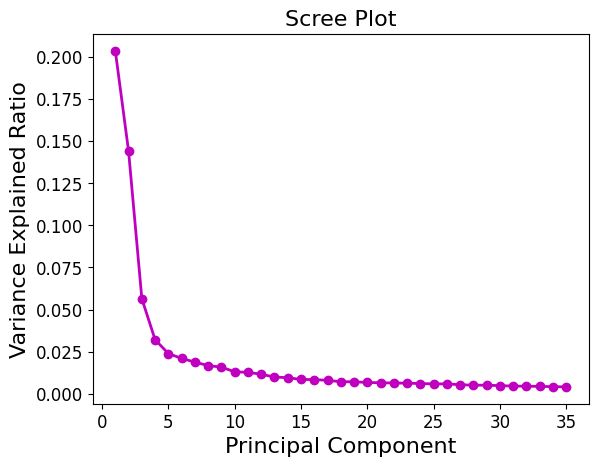

In [99]:
components_nr=35
type='negative'
n_most_important_features=5
df=pd.read_csv(f'data/{type}_norm_confirmed_normal/all_concatenated.csv', sep='\t')
df=df.drop(columns=['identifier', 'norm_confirmed', 'sex', 'female', 'male'])
prepare_dataset.divide_by_total_volume(df)

X_train, X_test=prepare_dataset.standarize_data(df, df)
pca_mri, train_pca, test_pca, importance_df=dimensions_reduction.principal_component_analysis(X_train, X_test, components_nr, n_features=n_most_important_features)
explained_variance_ratio=pca_mri.explained_variance_ratio_
formatted_explained_variance = [f"{num:.10f}" for num in explained_variance_ratio]
print('Explained variability per principal component: {}'.format(formatted_explained_variance))
print(len(formatted_explained_variance))
print(train_pca.shape, test_pca.shape)
plots.scree_plot(pca_mri, type=type)

In [87]:
import re

# Wczytaj dane z pliku
with open('positive_component1.txt', 'r') as file:
    data = file.read()

# Wzorzec do wyodrębnienia cech
pattern = r'Feature (\S+):\s*Mean: ([\-\d\.e]+)\s*Std Dev: ([\-\d\.e]+)'
matches = re.findall(pattern, data)

# Przygotowanie nagłówka tabeli LaTeX
latex_table = r"""
\begin{table}[H]
\caption{Cechy dla komponentu nr 3}
\begin{tabular}{|c|l|l|}
\hline
Comp\_nr & Atribute name                                    & Mean \& Std Dev                       \\ \hline
"""

# Dodaj dane do tabeli LaTeX
for i, match in enumerate(matches, start=1):
    feature_name, mean, std_dev = match
    feature_name = feature_name.replace('_', '\_')
    latex_table += f"3        & {feature_name} & {mean}±{std_dev} \\\\ \hline\n"

# Dodaj stopkę tabeli
latex_table += r"""
\end{tabular}
\end{table}
"""

# Zapisz do pliku .tex
with open('table.tex', 'w') as file:
    file.write(latex_table)

print("Tabela LaTeX została zapisana do pliku 'table.tex'.")


Tabela LaTeX została zapisana do pliku 'table.tex'.
